Seaborn 是基于 matplotlib 开发的高阶 Python 数据可视图库，用于绘制优雅、美观的统计图形。

In [1]:
import seaborn as sns

本帖还有用到其它的库，声明如下

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
np.random.seed(1031)

在 Matplotlib 那贴已提过，个人偏好百度 Echarts 里面的一组颜色，因此将其 hex 颜色代码定义出来，其中红色的 r_hex 和深青色的 dt_hex 是大爱。

In [3]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

将上面自定义颜色设置为 seaborn 里调色板，当然你可以用它里面默认调色板。

In [4]:
color = ['#dc2624', '#2b4750', '#45a0a2', '#e87a59',
         '#7dcaa9', '#649E7D', '#dc8018', '#C89F91', 
         '#6c6d6c', '#4f6268', '#c7cccf']
sns.set_palette( color )

本章我们用以下思路来讲解：

1. 第一章深度了解 (in-depth) 配对图 (pairplot)，在讲解时，我们配用数据清洗的案例分析，可供以后的「机器学习」用。

2. 第二章广度了解 (in-breadth) 其他类型的图，只是做个简单展示。

# 1 深度了解 Seaborn

## 1.1 鸢尾花识别
假设我们要创建一个智能手机应用程序，从智能手机拍摄的照片中自动识别花的种类。 我们正在与一个数据科学家团队合作，该数据科学主管负责创建一个演示机器学习模型，测量花的萼片长度 (sepal length)，萼片宽度 (sepal width)，花瓣长度 (petal length) 和花瓣宽度 (petal width) 四个变量，并根据这些测量识别物种。

等等，萼片是什么鬼？萼片是花的最外一环。下图清晰指出花的萼片和花瓣。
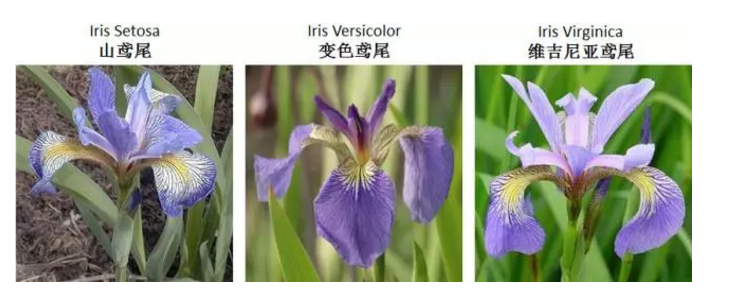
我们已经从现场研究人员获得了一个数据集，里面包括三种类型的鸢尾花的测量，如下图：
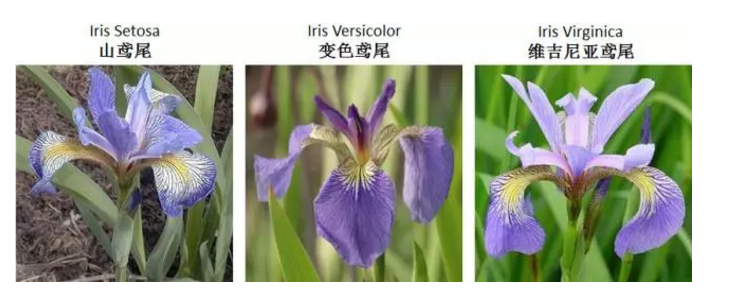
根据当地研究人员测量的每种鸢尾花的四个数据 (萼片长/宽和花瓣长/宽)，我们最终目的是想正确的分类这三种花。但重中之重的第一步是数据处理，有了干净数据之后再来机器学习很容易。

但怎么处理数据有时候更像一门艺术而不像一门科学。接下来会从

1. 检查数据
2. 清理数据
3. 测试数据

三方面来探索，在其过程中当然会借助 Seaborn。

### 检查数据
即便是政府或银行，他们公布的数据也有错误。在花费太多时间分析数据之前，提早检查并修正这些错误能节省大量时间。一般来说，我们希望回答以下问题：

1. 数据格式有什么问题吗？
2. 数据数值有什么问题吗？
3. 数据需要修复或删除吗？

#### 检查点 1. 数据格式
首先用 pandas 读取 csv 文件并将数据存成 DataFrame 格式。

In [5]:
iris_data = pd.read_csv('iris-data.csv', na_values=['NA'])

函数 read_csv() 里面用到的两个参数

* 第一个 filename 是读取 csv 文件名
* 第二个参数用来把 csv 里面空白处用 NaN 代替

In [6]:
iris_data.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


数据看起来是可用的 (大神 Hadley Wickhan 对干净数据的定义是，每一列代表一个特征；每一行代表一个样例)。

* 数据的第一行定义了列标题，标题的描述足以让我们了解每个列代表的内容 (萼片长度，萼片宽度，花瓣长度和花瓣宽度)，标题甚至给我们记录测量的单位 (cm, 厘米)

* 第一行之后的每一行代表一个花的观测数据：四个测量指标和一个类 (class)，它告诉我们花的种类。比如前 10 个都是山鸢尾花 (注意第 8 到 10 个的花瓣宽度没有数据，用 NaN 来表示)。
